In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


rectangles[]
22


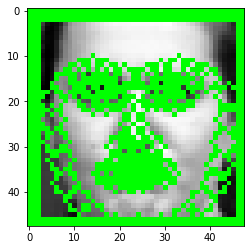

In [103]:

# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

# read the image
img = cv2.imread("/content/drive/MyDrive/CK+48/0/S117_006_00000010.png")
#img = cv2.imread('/content/drive/MyDrive/neutral1.jpg')

# Convert image into grayscale
#gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use detector to find landmarks
faces = detector(gray)
print(faces)
if len(faces)==0:
  face = dlib.rectangle(0, 0, 48, 48)
  x1 = face.left()
  y1 = face.top()
  x2 = face.right()
  y2 = face.bottom()       
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
  landmarks = predictor(image=gray, box=face)
  for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=1)
else:
  for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Create landmark object
    landmarks = predictor(image=gray, box=face)
    

    # Loop through all the points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

# show the image
# cv2.imshow(winname="Face", mat=img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print(x)

In [77]:
face.top()

0

In [78]:
(face.left())

0

In [80]:
img.shape

(48, 48, 3)

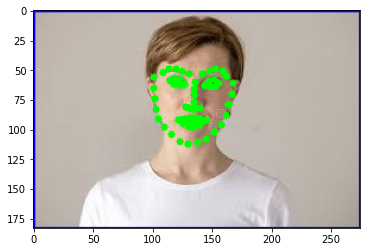

In [62]:
start_point = (0, 0) 
end_point = (275, 183)
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
img = cv2.rectangle(img, start_point, end_point, color, thickness) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

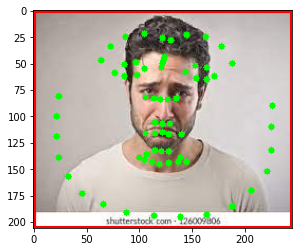

In [97]:
img = cv2.imread('/content/drive/MyDrive/sad1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face = dlib.rectangle(0, 0, 245, 206)
x1 = face.left()
y1 = face.top()
x2 = face.right()
y2 = face.bottom()       
landmarks = predictor(image=gray, box=face)
for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [94]:
img.shape

(206, 245, 3)

In [58]:
img.shape

(183, 275, 3)

In [50]:
landmarks

In [51]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

In [52]:
landmark_np = shape_to_np(landmarks)

In [53]:
landmark_np.shape

(68, 2)

In [57]:
np2 = landmark_np.reshape(-1,len(landmark_np))

In [58]:
np2.shape

(2, 68)

In [4]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

(256, 512, 3)


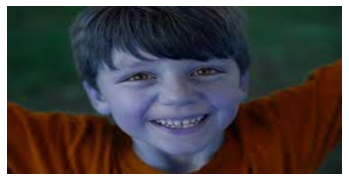

In [6]:
img = cv2.imread("/content/drive/MyDrive/HAPPY1.jpg")
resized_img = cv2.resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

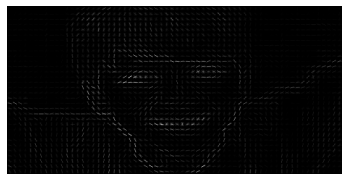

In [7]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [98]:
fd.shape

(70308,)

In [99]:
for i in range(0, 68):
  fd = np.insert(fd,0, landmarks.part(i).x)
  fd = np.insert(fd,0, landmarks.part(i).y)
fd.shape

(70444,)

In [8]:
Datadirectory = "/content/drive/MyDrive/CK+48"

In [9]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

In [33]:
Data = []
labels = []
hog_features = []
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

def create_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        count = 0
        for img in os.listdir(path):
            
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (128*4, 64*4))
                fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
                
                gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
                faces = detector(gray)
                for face in faces:
                    # x1 = face.left() # left point
                    # y1 = face.top() # top point
                    # x2 = face.right() # right point
                    # y2 = face.bottom() # bottom point
                    landmarks = predictor(image=gray, box=face)

                for i in range(0, 68):
                  fd = np.insert(fe,0, landmarks.part(i).x)
                  fd = np.insert(fe,0, landmarks.part(i).y)


                hog_features.append(fd)
                labels.append(class_num)
            except Exception as e:
                pass

In [34]:
create_Data()

In [24]:
import random

random.shuffle(Data)

In [35]:
from sklearn.model_selection import train_test_split
clf = svm.SVC()
X = np.array(hog_features)
y = np.array(labels)
y.shape
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


# data_frame = np.hstack((hog_features,labels))
# np.random.shuffle(data_frame)

(0,)

In [32]:
X.shape

(981, 70308)

In [15]:
clf.fit(X_train,y_train)

NameError: ignored

In [64]:
y_pred = clf.predict(X_test)

In [65]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9644670050761421


              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        38
           5       1.00      0.72      0.84        25
           6       0.95      1.00      0.97        53

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



In [69]:
X_test[0].shape

(70308,)

In [74]:
# fd.reshape(-1,1)
# # fd.shape

X_test.shape

(197, 70308)

In [80]:
img = cv2.imread("/content/drive/MyDrive/afraid1.jpg")
resized_img = cv2.resize(img, (128*4, 64*4))
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape
clf.predict(fd.reshape(1, 70308))

array([6])

In [94]:
a = np.array([[1, 1], [2, 2], [3, 3]])
a=np.insert(a, 0, 5)
np.insert(a, 0, 6)

array([6, 5, 1, 1, 2, 2, 3, 3])

In [42]:
hog_features=[]
img_array = cv2.imread("/content/drive/MyDrive/CK+48/0/S010_004_00000017.png")
resized_img = cv2.resize(img_array, (128*4, 64*4))
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
  cells_per_block=(2, 2), visualize=True, multichannel=True)

gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)
for face in faces:
    # x1 = face.left() # left point
    # y1 = face.top() # top point
    # x2 = face.right() # right point
    # y2 = face.bottom() # bottom point
    landmarks = predictor(image=gray, box=face)

for i in range(0, 68):
  fd = np.insert(fd,0, landmarks.part(i).x)
  fd = np.insert(fd,0, landmarks.part(i).y)


hog_features.append(fd)

In [43]:
fd.shape

(70444,)

In [44]:
hog_features= np.array(hog_features)

In [45]:
hog_features.shape

(1, 70444)